# Problem Statement : 
1) We are using the sentiments (https://www.kaggle.com/datasets/kazanova/sentiment140) dataset. 

2) In this dataset, there are 1.6 million tweets that have been labelled, as positive and/or negative. 

3) We perform data preprocessing on this dataset, split the dataset into training (80%) and testing data (20%). W

4) We then implement Logistic regression, K- Nearest Neighbors, Support Vector Machine, Ada Boost and Bagging on the training data and check the accuracy of the same. 

5) Further, we select the best algorithm that gives us the maximum accuracy, in this case (SVM) and then our model is ready. 

6) We then scrape tweets from Twitter using the snscape library of Python. 

7) Query all tweets that contain the keyword, "Pfizer", "Moderna", "Johnson&Johnson" between January 01 2020 to June 30 2020.

8) This will then be our testing dataset, we then apply our model to this data to gauge the sentiment of tweets containing the respective keywords.

9) Lastly, we perform some data visualization and infer some insights as to which vaccine had positive and/or negative tweets, getting the frequency of words.

## Importing all necessary libraries

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!pip3 install nltk

     |████████████████████████████████| 1.5 MB 24.8 MB/s 
     |████████████████████████████████| 96 kB 7.6 MB/s 
     |████████████████████████████████| 749 kB 57.5 MB/s 
     |████████████████████████████████| 306 kB 61.8 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
!conda install py-xgboost -y

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py37h89c1867_2         145 KB  conda-forge
    conda-4.12.0               |   py37h89c1867_0         1.0 MB  conda-forge
    cudatoolkit-11.1.1         |      h6406543_10        1.20 GB  conda-forge
    joblib-1.1.0               |     pyhd8ed1ab_0         210 KB  conda-forge
    libblas-3.9.0              |14_linux64_openblas          12 KB  conda-forge
    libcblas-3.9.0       

In [ ]:
!pip uninstall xgboost -y

Found existing installation: xgboost 1.5.1
Uninstalling xgboost-1.5.1:
  Successfully uninstalled xgboost-1.5.1


In [ ]:
pip install xgboost --no-binary xgboost -v

Using pip 21.0.1 from /usr/local/lib/python3.7/site-packages/pip (python 3.7)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-ephem-wheel-cache-sbzbyt8h
Created temporary directory: /tmp/pip-req-tracker-u1q4gvmw
Initialized build tracking at /tmp/pip-req-tracker-u1q4gvmw
Created build tracker: /tmp/pip-req-tracker-u1q4gvmw
Entered build tracker: /tmp/pip-req-tracker-u1q4gvmw
Created temporary directory: /tmp/pip-install-fwdcqpgt
1 location(s) to search for versions of xgboost:
* https://pypi.org/simple/xgboost/
Fetching project page and analyzing links: https://pypi.org/simple/xgboost/
Getting page https://pypi.org/simple/xgboost/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/xgboost/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/xgboost/ HTTP/1.1" 200 14951
Updating cache with response from "https://pypi.org/simple/xgb

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
import collections

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Loading the data and checking it's distribution, this is an important step to check whether the data is biased or not

In [ ]:
dataset = pd.read_csv('/sentinment1600k.csv',encoding="ISO-8859-1",names=['target','ids','date','flag','username','tweet'])

In [ ]:
dataset

,target,ids,date,flag,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## The dataset has 1.6 million rows

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   target    1600000 non-null  int64 
 1   ids       1600000 non-null  int64 
 2   date      1600000 non-null  object
 3   flag      1600000 non-null  object
 4   username  1600000 non-null  object
 5   tweet     1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## 0 is for negative tweets , 4 is for positive, we prove that the dataset has equal number of positive and negative rows. We can now infer that the data is balanced since, it has 800k positive tweets and 800k negative tweets

In [ ]:
dataset['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

[Text(0, 0, 'Negative Tweets'), Text(0, 0, 'Positive Tweets')]

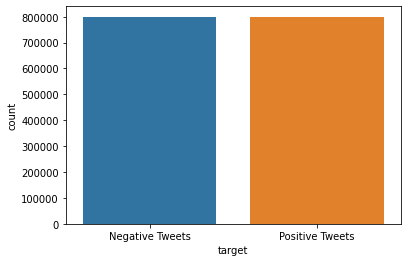

In [ ]:
ax = sns.countplot(x='target', data=dataset)
ax.set_xticklabels(['Negative Tweets','Positive Tweets'], rotation=0)

### Data PreProcessing and Cleaning

In [ ]:
df = dataset[['tweet','target']]

In [ ]:
df

,tweet,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


## Replacing 4 with 1 , since we have binary values for positive and negative tweets

In [ ]:
df['target'] = df['target'].replace(4,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,tweet,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1


In [ ]:
df['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [ ]:
df_pos = df[df['target']==1]
df_neg = df[df['target']==0]

## We are dropping 1.5 million rows, since the dataset is too huge, we are trying to keep it a balanced dataset of about 100k rows

In [ ]:
df_final = pd.concat([df_pos[0:50000],df_neg[0:50000]])

In [ ]:
df_final.shape

(100000, 2)

In [ ]:
df_final.reset_index(inplace=True)

In [ ]:
df_final

,index,tweet,target
0,800000,I LOVE @Health4UandPets u guys r the best!!,1
1,800001,im meeting up with one of my besties tonight! ...,1
2,800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
3,800003,Being sick can be really cheap when it hurts t...,1
4,800004,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...,...
99995,49995,@mileycyrus so i have the same insomnia prob a...,0
99996,49996,20 mintues late for my meeting starting @ 8 h...,0
99997,49997,@kentucky_derby super excited! Are you tweetin...,0
99998,49998,I WANT ANOTHER DAY OFF!!!! To much Sh#t to do...,0


In [ ]:
df_final['tweet']=df_final['tweet'].str.lower()

In [ ]:
df_final['tweet']

0             i love @health4uandpets u guys r the best!! 
1        im meeting up with one of my besties tonight! ...
2        @darealsunisakim thanks for the twitter add, s...
3        being sick can be really cheap when it hurts t...
4          @lovesbrooklyn2 he has that effect on everyone 
                               ...                        
99995    @mileycyrus so i have the same insomnia prob a...
99996    20 mintues late for my meeting starting @ 8  h...
99997    @kentucky_derby super excited! are you tweetin...
99998    i want another day off!!!!  to much sh#t to do...
99999                 i just jacked up this umbrella cake 
Name: tweet, Length: 100000, dtype: object

## Data preprocessing starts here.
# We will remove stop words, usernames, punctuation, URLs, numbers, tokenize the tweets and finally perform lemmatization 

### Removing Stopwords ; Stopwords are all words that are trivial and do not affect the sentiment of the tweet. These words are extra and it needs to be removed

In [ ]:

stops = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stops])
df_final['tweet'] = df_final['tweet'].apply(lambda text: remove_stopwords(text))

In [ ]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

#### Removing Usernames; all usernames in the tweets will start with @ , and those need to be removed

In [ ]:
def remove_usernames(text):
    return re.sub(r"@[A-Za-z0–9_]+",'',text)
df_final['tweet'] = df_final['tweet'].apply(lambda text: remove_usernames(text))

#### Removing Punctuations, punctuations are not necessary to find out the sentiments of the tweets and thereby removing it

In [ ]:
eng_punctuations = string.punctuation
def remove_punctuations(text):
    dict_translate = str.maketrans('', '', eng_punctuations)
    return text.translate(dict_translate)
df_final['tweet'] = df_final['tweet'].apply(lambda text: remove_punctuations(text))

In [ ]:
eng_punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Removing URLs

In [ ]:
def removing_URLs(text):
    return re.sub('[^\w\s]|http\S+',' ',text)
df_final['tweet'] = df_final['tweet'] .apply(lambda text: removing_URLs(text))

#### Removing Numbers

In [ ]:
def removing_numbers(text):
    return re.sub('[0-9]+', '', text)
df_final['tweet'] = df_final['tweet'].apply(lambda text: removing_numbers(text))

In [ ]:
df_final['tweet']

0                              love uandpets u guys r best
1        im meeting one besties tonight cant wait  girl...
2         thanks twitter add sunisa got meet hin show d...
3        sick really cheap hurts much eat real food plu...
4                                          effect everyone
                               ...                        
99995     insomnia prob slept  hrs woke am nd couldnt g...
99996     mintues late meeting starting   howd know goi...
99997     super excited tweeting event happenings way f...
99998    want another day off much sht today got quotne...
99999                                 jacked umbrella cake
Name: tweet, Length: 100000, dtype: object

#### Tokenizing the tweets ; the entire sentence (tweet) would be converted to a list of independent words, this will help us in lemmatization

In [ ]:
df_final['tweet'] = df_final['tweet'].apply(lambda text: nltk.word_tokenize(text))
df_final['tweet'].head()

0                   [love, uandpets, u, guys, r, best]
1    [im, meeting, one, besties, tonight, cant, wai...
2    [thanks, twitter, add, sunisa, got, meet, hin,...
3    [sick, really, cheap, hurts, much, eat, real, ...
4                                   [effect, everyone]
Name: tweet, dtype: object

#### Performing Lemmatization ; Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .
Ref : https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html#:~:text=Lemmatization%20usually%20refers%20to%20doing,is%20known%20as%20the%20lemma%20.

In [ ]:
lemma = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [lemma.lemmatize(word) for word in text]
    return text
df_final['tweet'] = df_final['tweet'].apply(lambda text: lemmatizer(text))
df_final['tweet'].head()

0                    [love, uandpets, u, guy, r, best]
1    [im, meeting, one, besties, tonight, cant, wai...
2    [thanks, twitter, add, sunisa, got, meet, hin,...
3    [sick, really, cheap, hurt, much, eat, real, f...
4                                   [effect, everyone]
Name: tweet, dtype: object

## Performing data Modeling

In [ ]:
X = df_final.tweet.apply(lambda x : " ".join(x))
y = df_final.target

## Splitting our data into 80% training set and 20% testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =2,stratify=y)

In [ ]:
y_train.value_counts()

1    40000
0    40000
Name: target, dtype: int64

In [ ]:
y_test.value_counts()

0    10000
1    10000
Name: target, dtype: int64

## Performing TF-IDF Conversion: 
TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations

Ref : https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/

In [ ]:
tf_vect = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
tf_vect.fit(X_train)
print('No. of feature_words: ', len(tf_vect.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  388561


In [ ]:
X_train_tfidf = tf_vect.transform(X_train)
X_test_tfidf  = tf_vect.transform(X_test)

### Model Evaluation Function, this function will be called for each Machine learning algorithm, that we have learnt and out of all that we implement we will be selecting the best one and use it on our testing dataset

In [ ]:
def model_evaluate(model,X_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg ','False Pos ', 'False Neg ','True Pos' ]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Greens',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':16}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':16}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':16}, pad = 25)

### Logistic Regression Model

In [ ]:
lr_model = LogisticRegression(C = 1, max_iter = 1000, penalty = 'l2', n_jobs=-1)
lr_model.fit(X_train_tfidf  ,y_train)

LogisticRegression(C=1, max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77     10000
           1       0.76      0.77      0.77     10000

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000



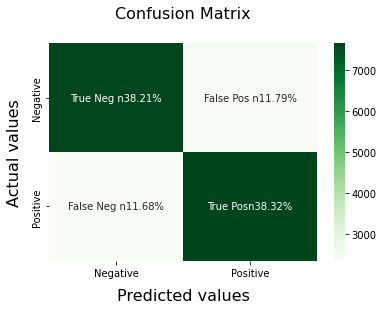

In [ ]:
model_evaluate(lr_model ,X_test_tfidf)

### Accuracy for logistic regression : 77%

### SVM Model

In [ ]:
### Tried C=0.01,0.1,1
svm_model = LinearSVC(C=0.1)
svm_model.fit(X_train_tfidf  ,y_train)

LinearSVC(C=0.1)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76     10000
           1       0.76      0.77      0.77     10000

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000



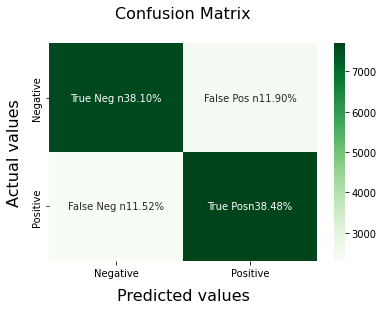

In [ ]:
model_evaluate(svm_model ,X_test_tfidf)

### Accuracy for SVM : 77%

### KNN

In [ ]:
## tried k=3,5,7,9
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train_tfidf ,y_train)

KNeighborsClassifier(n_neighbors=9)

              precision    recall  f1-score   support

           0       0.56      0.42      0.48     10000
           1       0.54      0.67      0.60     10000

    accuracy                           0.55     20000
   macro avg       0.55      0.55      0.54     20000
weighted avg       0.55      0.55      0.54     20000



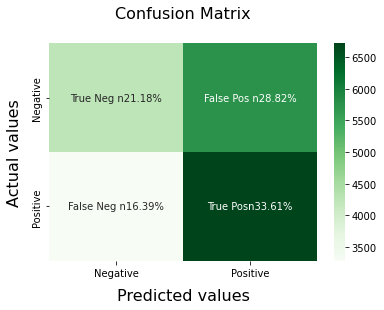

In [ ]:
model_evaluate(knn_model ,X_test_tfidf)

### Accuracy for KNN : 55%

### Ada Boost Classifier

In [ ]:
## Tried n_estimators = 10,25,50,75,100
pipeline =  DecisionTreeClassifier(random_state=1)
boostclassifier_model = AdaBoostClassifier(base_estimator=pipeline, n_estimators=2,
                                 random_state=1,learning_rate =0.1)
boostclassifier_model.fit(X_train_tfidf ,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                   learning_rate=0.1, n_estimators=2, random_state=1)

              precision    recall  f1-score   support

           0       0.67      0.76      0.71     10000
           1       0.72      0.62      0.67     10000

    accuracy                           0.69     20000
   macro avg       0.70      0.69      0.69     20000
weighted avg       0.70      0.69      0.69     20000



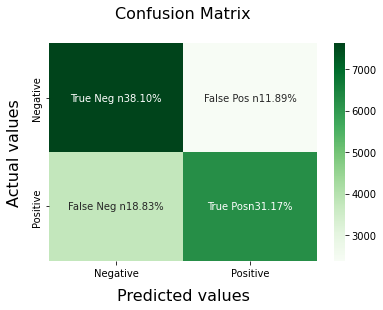

In [ ]:
model_evaluate(boostclassifier_model ,X_test_tfidf)

### Accuracy for Adaboost : 69%

### Bagging Classifier

In [ ]:
## Tried n_estimators = 10,25,50,75,100
pipeline = make_pipeline(DecisionTreeClassifier(random_state=1))

bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=2,
                                 max_features=X_train_tfidf.shape[1]//2,
                                 max_samples=X_train_tfidf.shape[0]//2,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_tfidf, y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('decisiontreeclassifier',
                                                  DecisionTreeClassifier(random_state=1))]),
                  max_features=194280, max_samples=40000, n_estimators=2,
                  n_jobs=5, random_state=1)

              precision    recall  f1-score   support

           0       0.62      0.79      0.69     10000
           1       0.71      0.51      0.59     10000

    accuracy                           0.65     20000
   macro avg       0.66      0.65      0.64     20000
weighted avg       0.66      0.65      0.64     20000



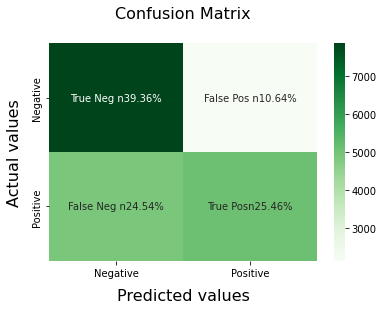

In [ ]:
model_evaluate(bgclassifier ,X_test_tfidf)

### Accuracy for bagging : 64%

### Loading the covid vaccine data

In [ ]:
!pip3 install snscrape

     |████████████████████████████████| 6.4 MB 29.5 MB/s 
     |████████████████████████████████| 128 kB 62.7 MB/s 


In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

### Extracting Tweets for the search keyword Pfizer between January 01 2020 to June 30 2020

In [ ]:
df_pf1 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'pfizer Pfizer vaccine lang:en since:2020-01-01 until:2020-01-31').get_items(), 1000))[['date', 'content']]
df_pf2 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'pfizer Pfizer vaccine lang:en since:2020-02-01 until:2020-02-28').get_items(), 1000))[['date', 'content']]
df_pf3 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'pfizer Pfizer vaccine lang:en since:2020-03-01 until:2020-03-31').get_items(), 1000))[['date', 'content']]
df_pf4 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'pfizer Pfizer vaccine lang:en since:2020-04-01 until:2020-04-30').get_items(), 1000))[['date', 'content']]
df_pf5 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'pfizer Pfizer vaccine lang:en since:2020-05-01 until:2020-05-31').get_items(), 1000))[['date', 'content']]
df_pf6 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'pfizer Pfizer vaccine lang:en since:2020-06-01 until:2020-06-30').get_items(), 1000))[['date', 'content']]

In [ ]:
df_pf = df_pf1.append([df_pf2,df_pf3,df_pf4,df_pf5,df_pf6],ignore_index=True)

In [ ]:
df_pf['content'][5]

'The University of Louisville’s Division of Infectious Diseases and Pfizer Inc. announced they are collaborating on epidemiological research Jan. 23. The research will be related to vaccine-preventable diseases affecting adults, including the elderly.\n\nhttps://t.co/rVvrmTWtCi'

In [ ]:
df_pf.to_csv (r'tweets_pf.csv', index = False, header=True)

In [ ]:
### Extracting Tweets for the search keyword Moderna between January 01 2020 to June 30 2020

In [ ]:
df_mod1 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'moderna Moderna vaccine lang:en since:2020-01-01 until:2020-01-31').get_items(), 1000))[['date', 'content']]
df_mod2 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'moderna Moderna vaccine lang:en since:2020-02-01 until:2020-02-28').get_items(), 1000))[['date', 'content']]
df_mod3 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'moderna Moderna vaccine lang:en since:2020-03-01 until:2020-03-31').get_items(), 1000))[['date', 'content']]
df_mod4 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'moderna Moderna vaccine lang:en since:2020-04-01 until:2020-04-30').get_items(), 1000))[['date', 'content']]
df_mod5 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'moderna Moderna vaccine lang:en since:2020-05-01 until:2020-05-31').get_items(), 1000))[['date', 'content']]
df_mod6 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'moderna Moderna vaccine lang:en since:2020-06-01 until:2020-06-30').get_items(), 1000))[['date', 'content']]

In [ ]:
df_mod = df_mod1.append([df_mod2,df_mod3,df_mod4,df_mod5,df_mod6],ignore_index=True)

In [ ]:
df_mod

,date,content
0,2020-01-30 17:44:58+00:00,'Moderna Inc in Massachusetts has also joined ...
1,2020-01-30 15:49:04+00:00,.@CEPIvaccines is funding three programs to de...
2,2020-01-30 15:37:04+00:00,Kudos to our friends @CEPIvaccines and @modern...
3,2020-01-30 12:20:00+00:00,CEPI to fund three programmes to develop #vacc...
4,2020-01-30 12:06:59+00:00,CEPI to fund three programmes to develop #vacc...
...,...,...
5317,2020-06-23 12:51:21+00:00,@Dereklowe how far behind Translate Bio from M...
5318,2020-06-23 12:26:05+00:00,Moderna to begin testing its COVID-19 vaccine ...
5319,2020-06-23 12:08:55+00:00,I just saw on Israel News Now that Moderna wil...
5320,2020-06-23 11:51:16+00:00,@BlossomingLilac Nope 😁 Vaccines developed by ...


In [ ]:
df_mod['content'][1]

'.@CEPIvaccines is funding three programs to develop vaccines for #2019nCoV, including through partnerships with @InovioPharma, @moderna_tx, @NIAIDNews and @UQ_News https://t.co/yCYPxJxejD'

In [ ]:
df_mod.to_csv (r'tweets_mod.csv', index = False, header=True)

### Extracting Tweets for the search keyword JOhnson&Johnson between January 01 2020 to June 30 2020

In [ ]:
df_jj1 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'johnson&johnson Johnson&Johnson vaccine  lang:en since:2020-01-01 until:2020-01-30').get_items(), 1000))[['date', 'content']]
df_jj2 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'johnson&johnson Johnson&Johnson vaccine  lang:en since:2020-02-01 until:2020-02-28').get_items(), 1000))[['date', 'content']]
df_jj3 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'johnson&johnson Johnson&Johnson vaccine  lang:en since:2020-03-01 until:2020-03-31').get_items(), 1000))[['date', 'content']]
df_jj4 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'johnson&johnson Johnson&Johnson vaccine  lang:en since:2020-04-01 until:2020-04-30').get_items(), 1000))[['date', 'content']]
df_jj5 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'johnson&johnson Johnson&Johnson vaccine  lang:en since:2020-05-01 until:2020-05-31').get_items(), 1000))[['date', 'content']]
df_jj6 = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'johnson&johnson Johnson&Johnson vaccine  lang:en since:2020-06-01 until:2020-06-30').get_items(), 1000))[['date', 'content']]


In [ ]:
df_jj = df_jj1.append([df_jj2,df_jj3,df_jj4,df_jj5,df_jj6],ignore_index=True)

In [ ]:
df_jj

,date,content
0,2020-01-29 23:56:25+00:00,Johnson &amp; Johnson working on vaccine for d...
1,2020-01-29 23:49:52+00:00,Really not surprised that Johnson &amp; Johnso...
2,2020-01-29 23:17:05+00:00,@JNJNews @SquawkCNBC Don’t wait get your coron...
3,2020-01-29 22:34:46+00:00,Johnson &amp; Johnson Advised Coronavirus Simu...
4,2020-01-29 22:28:11+00:00,#News Johnson &amp; Johnson Advised Coronaviru...
...,...,...
4428,2020-06-10 17:53:42+00:00,Johnson &amp; Johnson Announces Acceleration o...
4429,2020-06-10 17:49:55+00:00,Johnson &amp; Johnson to begin human trials fo...
4430,2020-06-10 17:43:33+00:00,Johnson &amp; Johnson moves up start of corona...
4431,2020-06-10 17:43:32+00:00,Johnson &amp; Johnson moves up start of corona...


In [ ]:
df_jj['content'][0]

'Johnson &amp; Johnson working on vaccine for deadly coronavirus https://t.co/aqMuHdINtA'

In [ ]:
df_jj.to_csv (r'tweets_jj.csv', index = False, header=True)

In [ ]:
d1 = pd.read_csv('tweets_pf.csv')
d2 = pd.read_csv('tweets_mod.csv')
d3 = pd.read_csv('tweets_jj.csv')

In [ ]:
d1['vaccine'] = 'pfizer'
d2['vaccine'] = 'moderna'
d3['vaccine'] = 'johnson&johnson'
d = d1.append([d2,d3],ignore_index=True)

In [ ]:
d

,date,content,vaccine
0,2020-01-30 23:17:54+00:00,Certain #diseases can be serious for #pregnant...,pfizer
1,2020-01-30 20:44:05+00:00,If one of the #pharma companies like @sanofi @...,pfizer
2,2020-01-30 20:15:46+00:00,@pfizer Safe and effective is your go to phras...,pfizer
3,2020-01-30 18:39:49+00:00,@WordswithSteph Whereas he happily betrayed al...,pfizer
4,2020-01-30 17:35:31+00:00,"For Russia "" Chorona Virus"" Medicines and Vacc...",pfizer
...,...,...,...
13986,2020-06-10 17:53:42+00:00,Johnson &amp; Johnson Announces Acceleration o...,johnson&johnson
13987,2020-06-10 17:49:55+00:00,Johnson &amp; Johnson to begin human trials fo...,johnson&johnson
13988,2020-06-10 17:43:33+00:00,Johnson &amp; Johnson moves up start of corona...,johnson&johnson
13989,2020-06-10 17:43:32+00:00,Johnson &amp; Johnson moves up start of corona...,johnson&johnson


In [ ]:
d['content'][1]

'If one of the #pharma companies like @sanofi @AstraZeneca @abbvie @pfizer @Roche @Merck @Novartis comes up with a #coronarvirus #vaccine, how much would you pay for it if it’s not covered by #insurance? #coronavirususa #Coronaphobia #CoronaOutbreak'

### Removing amp

In [ ]:
def removing_amp(text):
    return re.sub('amp;', '', text)

### Cleaning Test Data

In [ ]:
# converting to lower case
d['content']=d['content'].str.lower()
# removing stop words
d['content'] = d['content'].apply(lambda text: remove_stopwords(text))
# removing usernames
d['content'] = d['content'].apply(lambda text: remove_usernames(text))
# removing amp
d['content'] = d['content'].apply(lambda text: removing_amp(text))
# removing punctuations
d['content'] = d['content'].apply(lambda text: remove_punctuations(text))
# removing urls
d['content'] = d['content'] .apply(lambda text: removing_URLs(text))
# removing numbers
d['content'] = d['content'].apply(lambda text: removing_numbers(text))
# tokenizing
d['content'] = d['content'].apply(lambda text: nltk.word_tokenize(text))
# lemmatization
d['content'] = d['content'].apply(lambda text: lemmatizer(text))

In [ ]:
d['content'][0]

['certain',
 'disease',
 'serious',
 'pregnant',
 'mother',
 'developing',
 'baby',
 'statement',
 'false',
 'recommended',
 'vaccine',
 'pregnancy']

### Word Cloud for pfizer

In [ ]:
d.content

0        [certain, disease, serious, pregnant, mother, ...
1        [one, pharma, company, like, come, coronarviru...
2        [safe, effective, go, phrase, safe, effective,...
3        [whereas, happily, betrayed, all, promised, pa...
4        [russia, chorona, virus, medicine, vaccine, ho...
                               ...                        
13986    [johnson, johnson, announces, acceleration, co...
13987    [johnson, johnson, begin, human, trial, corona...
13988    [johnson, johnson, move, start, coronavirus, v...
13989    [johnson, johnson, move, start, coronavirus, v...
13990    [know, johnsonjohnson, made, baby, shampoo, ye...
Name: content, Length: 13991, dtype: object

In [ ]:
d.content.apply(lambda x : " ".join(x))

0        certain disease serious pregnant mother develo...
1        one pharma company like come coronarvirus vacc...
2        safe effective go phrase safe effective apply ...
3        whereas happily betrayed all promised parent f...
4        russia chorona virus medicine vaccine hospital...
                               ...                        
13986    johnson johnson announces acceleration covid v...
13987    johnson johnson begin human trial coronavirus ...
13988    johnson johnson move start coronavirus vaccine...
13989    johnson johnson move start coronavirus vaccine...
13990    know johnsonjohnson made baby shampoo yeah yea...
Name: content, Length: 13991, dtype: object

In [ ]:
d['content_comb'] = d.content.apply(lambda x : " ".join(x))

In [ ]:
d

,date,content,vaccine,content_comb
0,2020-01-30 23:17:54+00:00,"[certain, disease, serious, pregnant, mother, ...",pfizer,certain disease serious pregnant mother develo...
1,2020-01-30 20:44:05+00:00,"[one, pharma, company, like, come, coronarviru...",pfizer,one pharma company like come coronarvirus vacc...
2,2020-01-30 20:15:46+00:00,"[safe, effective, go, phrase, safe, effective,...",pfizer,safe effective go phrase safe effective apply ...
3,2020-01-30 18:39:49+00:00,"[whereas, happily, betrayed, all, promised, pa...",pfizer,whereas happily betrayed all promised parent f...
4,2020-01-30 17:35:31+00:00,"[russia, chorona, virus, medicine, vaccine, ho...",pfizer,russia chorona virus medicine vaccine hospital...
...,...,...,...,...
13986,2020-06-10 17:53:42+00:00,"[johnson, johnson, announces, acceleration, co...",johnson&johnson,johnson johnson announces acceleration covid v...
13987,2020-06-10 17:49:55+00:00,"[johnson, johnson, begin, human, trial, corona...",johnson&johnson,johnson johnson begin human trial coronavirus ...
13988,2020-06-10 17:43:33+00:00,"[johnson, johnson, move, start, coronavirus, v...",johnson&johnson,johnson johnson move start coronavirus vaccine...
13989,2020-06-10 17:43:32+00:00,"[johnson, johnson, move, start, coronavirus, v...",johnson&johnson,johnson johnson move start coronavirus vaccine...


In [ ]:
d_pf = d[d['vaccine']=='pfizer']
d_mod = d[d['vaccine']=='moderna']
d_jj = d[d['vaccine']=='johnson&johnson']

### Word Cloud for Pfizer tweets

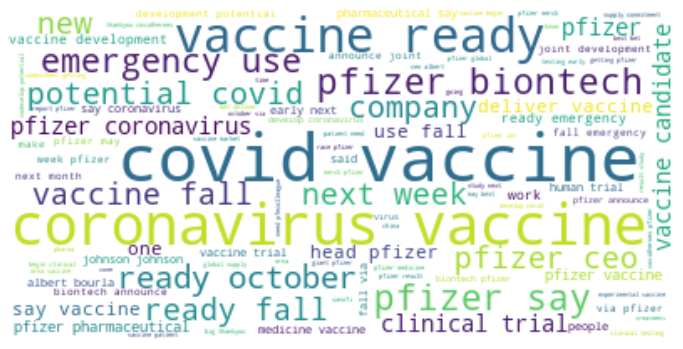

In [ ]:
#text = " ".join(c for c in d.content)
text = " ".join(review for review in d_pf.content_comb)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for Moderna tweets

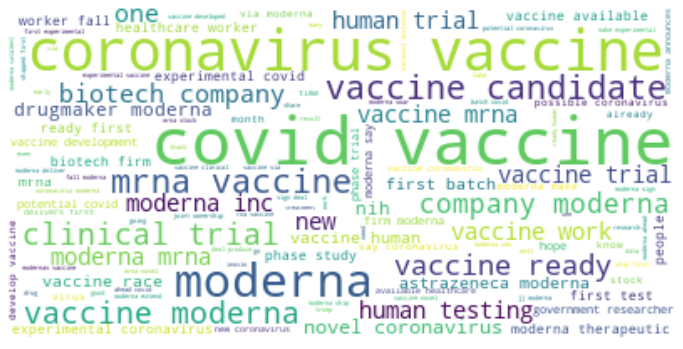

In [ ]:
#text = " ".join(c for c in d.content)
text = " ".join(review for review in d_mod.content_comb)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for Johnson and Johnson tweets

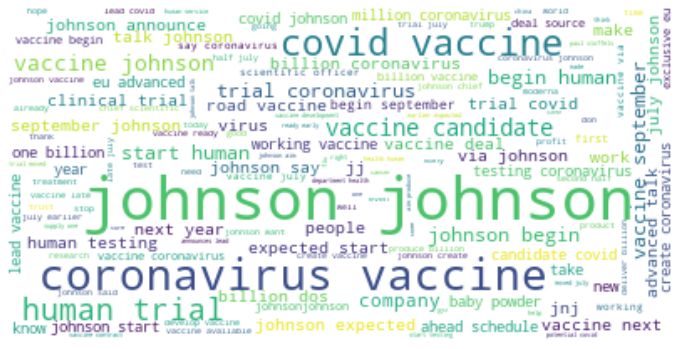

In [ ]:
#text = " ".join(c for c in d.content)
text = " ".join(review for review in d_jj.content_comb)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Top N words occuring in Pfizer Tweets

How many most common words to print: 10

The 10 most common words are as follows

vaccine :  4954
pfizer :  3550
covid :  1702
coronavirus :  1171
could :  931
ready :  705
biontech :  617
fall :  565
say :  551
company :  509


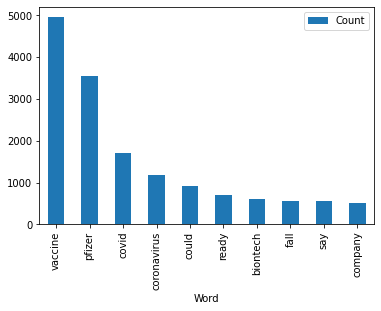

In [ ]:
text = " ".join(word for word in d_pf.content_comb)
wordcount = {}
for word in text.lower().split():
    if len(word)>1:
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in wordcount:
                wordcount[word] = 1
        else:
                wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nThe {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

### Top N words occuring in Moderna Tweets

How many most common words to print: 10

The 10 most common words are as follows

vaccine :  6321
moderna :  4623
covid :  2088
coronavirus :  2079
mrna :  1373
trial :  1007
first :  776
company :  661
phase :  614
testing :  585


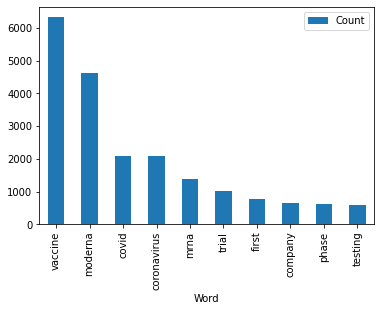

In [ ]:
text = " ".join(word for word in d_mod.content_comb)
wordcount = {}
for word in text.lower().split():
    if len(word)>1:
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in wordcount:
                wordcount[word] = 1
        else:
                wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nThe {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

### Top N words occuring in Johnson and Johnson Tweets

How many most common words to print: 10

The 10 most common words are as follows

johnson :  6294
vaccine :  5126
coronavirus :  1850
covid :  1565
human :  914
trial :  879
september :  500
start :  451
begin :  445
company :  432


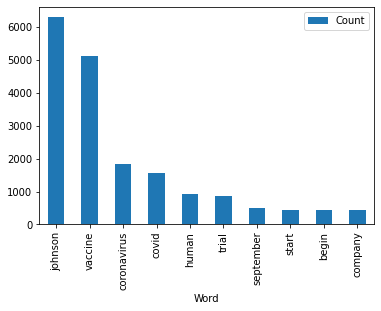

In [ ]:
text = " ".join(word for word in d_jj.content_comb)
wordcount = {}
for word in text.lower().split():
    if len(word)>1:
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in wordcount:
                wordcount[word] = 1
        else:
                wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nThe {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

### Finding out the sentiments of the covid tweets using the SVM model

In [ ]:
X_final = d.content.apply(lambda x : " ".join(x))
X_tfidf = tf_vect.transform(X_final)

In [ ]:
y_pred_final = svm_model.predict(X_tfidf)

In [ ]:
y_pred_final

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
d['sentiment_num'] = y_pred_final.tolist()

In [ ]:
d

,date,content,vaccine,content_comb,month_num,month,sentiment_num
0,2020-01-30 23:17:54+00:00,"[certain, disease, serious, pregnant, mother, ...",pfizer,certain disease serious pregnant mother develo...,1,January,1
1,2020-01-30 20:44:05+00:00,"[one, pharma, company, like, come, coronarviru...",pfizer,one pharma company like come coronarvirus vacc...,1,January,0
2,2020-01-30 20:15:46+00:00,"[safe, effective, go, phrase, safe, effective,...",pfizer,safe effective go phrase safe effective apply ...,1,January,1
3,2020-01-30 18:39:49+00:00,"[whereas, happily, betrayed, all, promised, pa...",pfizer,whereas happily betrayed all promised parent f...,1,January,0
4,2020-01-30 17:35:31+00:00,"[russia, chorona, virus, medicine, vaccine, ho...",pfizer,russia chorona virus medicine vaccine hospital...,1,January,0
...,...,...,...,...,...,...,...
13986,2020-06-10 17:53:42+00:00,"[johnson, johnson, announces, acceleration, co...",johnson&johnson,johnson johnson announces acceleration covid v...,6,June,1
13987,2020-06-10 17:49:55+00:00,"[johnson, johnson, begin, human, trial, corona...",johnson&johnson,johnson johnson begin human trial coronavirus ...,6,June,0
13988,2020-06-10 17:43:33+00:00,"[johnson, johnson, move, start, coronavirus, v...",johnson&johnson,johnson johnson move start coronavirus vaccine...,6,June,1
13989,2020-06-10 17:43:32+00:00,"[johnson, johnson, move, start, coronavirus, v...",johnson&johnson,johnson johnson move start coronavirus vaccine...,6,June,1


In [ ]:
d['sentiment'] = ['Positive' if x ==1 else 'Negative' for x in d['sentiment_num']]

In [ ]:
d

,date,content,vaccine,content_comb,month_num,month,sentiment_num,sentiment
0,2020-01-30 23:17:54+00:00,"[certain, disease, serious, pregnant, mother, ...",pfizer,certain disease serious pregnant mother develo...,1,January,1,Positive
1,2020-01-30 20:44:05+00:00,"[one, pharma, company, like, come, coronarviru...",pfizer,one pharma company like come coronarvirus vacc...,1,January,0,Negative
2,2020-01-30 20:15:46+00:00,"[safe, effective, go, phrase, safe, effective,...",pfizer,safe effective go phrase safe effective apply ...,1,January,1,Positive
3,2020-01-30 18:39:49+00:00,"[whereas, happily, betrayed, all, promised, pa...",pfizer,whereas happily betrayed all promised parent f...,1,January,0,Negative
4,2020-01-30 17:35:31+00:00,"[russia, chorona, virus, medicine, vaccine, ho...",pfizer,russia chorona virus medicine vaccine hospital...,1,January,0,Negative
...,...,...,...,...,...,...,...,...
13986,2020-06-10 17:53:42+00:00,"[johnson, johnson, announces, acceleration, co...",johnson&johnson,johnson johnson announces acceleration covid v...,6,June,1,Positive
13987,2020-06-10 17:49:55+00:00,"[johnson, johnson, begin, human, trial, corona...",johnson&johnson,johnson johnson begin human trial coronavirus ...,6,June,0,Negative
13988,2020-06-10 17:43:33+00:00,"[johnson, johnson, move, start, coronavirus, v...",johnson&johnson,johnson johnson move start coronavirus vaccine...,6,June,1,Positive
13989,2020-06-10 17:43:32+00:00,"[johnson, johnson, move, start, coronavirus, v...",johnson&johnson,johnson johnson move start coronavirus vaccine...,6,June,1,Positive


### Total Number of Positive and Negative tweets across all vaccines

In [ ]:
d['sentiment'].value_counts()

Positive    9412
Negative    4579
Name: sentiment, dtype: int64

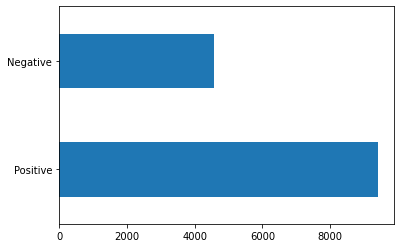

In [ ]:
d['sentiment'].value_counts().plot(kind='barh')

### Number of Positive and Negative tweets across the keyword pfizer

In [ ]:
d_pf = d[d['vaccine']=='pfizer']
d_pf['sentiment'].value_counts()

Positive    3003
Negative    1233
Name: sentiment, dtype: int64

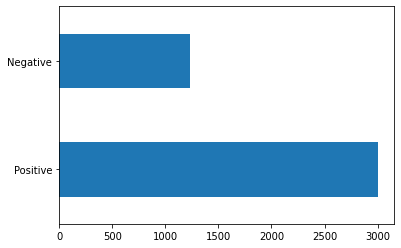

In [ ]:
d_pf['sentiment'].value_counts().plot(kind='barh')

### Number of Positive and Negative tweets across the keyword moderna

In [ ]:
d_mod = d[d['vaccine']=='moderna']
d_mod['sentiment'].value_counts()

Positive    3648
Negative    1674
Name: sentiment, dtype: int64

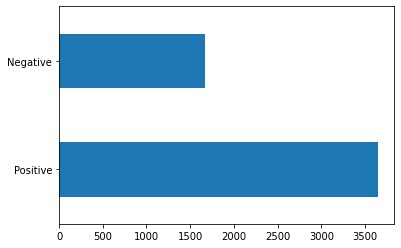

In [ ]:
d_mod['sentiment'].value_counts().plot(kind='barh')

### Number of Positive and Negative tweets across the keyword johnson and johnson

In [ ]:
d_jj = d[d['vaccine']=='johnson&johnson']
d_jj['sentiment'].value_counts()

Positive    2761
Negative    1672
Name: sentiment, dtype: int64

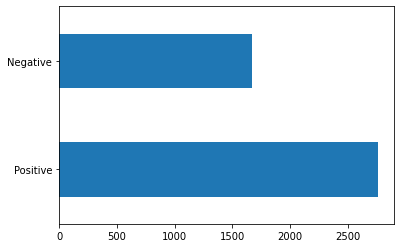

In [ ]:
d_jj['sentiment'].value_counts().plot(kind='barh')

In [ ]:
d['month_num'] = pd.DatetimeIndex(d['date']).month
d['month'] = 'January'
for i in range(len(d)):
    if d['month_num'][i]==1:
        d['month'][i] = 'January'
    elif d['month_num'][i]==2:
        d['month'][i] = 'Febraury'
    elif d['month_num'][i]==3:
        d['month'][i] = 'March'
    elif d['month_num'][i]==4:
        d['month'][i] = 'April'
    elif d['month_num'][i]==5:
        d['month'][i] = 'May'
    else:
        d['month'][i] = 'June'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: Se

In [ ]:
d

,date,content,vaccine,content_comb,month_num,month,sentiment_num,sentiment
0,2020-01-30 23:17:54+00:00,"[certain, disease, serious, pregnant, mother, ...",pfizer,certain disease serious pregnant mother develo...,1,January,1,Positive
1,2020-01-30 20:44:05+00:00,"[one, pharma, company, like, come, coronarviru...",pfizer,one pharma company like come coronarvirus vacc...,1,January,0,Negative
2,2020-01-30 20:15:46+00:00,"[safe, effective, go, phrase, safe, effective,...",pfizer,safe effective go phrase safe effective apply ...,1,January,1,Positive
3,2020-01-30 18:39:49+00:00,"[whereas, happily, betrayed, all, promised, pa...",pfizer,whereas happily betrayed all promised parent f...,1,January,0,Negative
4,2020-01-30 17:35:31+00:00,"[russia, chorona, virus, medicine, vaccine, ho...",pfizer,russia chorona virus medicine vaccine hospital...,1,January,0,Negative
...,...,...,...,...,...,...,...,...
13986,2020-06-10 17:53:42+00:00,"[johnson, johnson, announces, acceleration, co...",johnson&johnson,johnson johnson announces acceleration covid v...,6,June,1,Positive
13987,2020-06-10 17:49:55+00:00,"[johnson, johnson, begin, human, trial, corona...",johnson&johnson,johnson johnson begin human trial coronavirus ...,6,June,0,Negative
13988,2020-06-10 17:43:33+00:00,"[johnson, johnson, move, start, coronavirus, v...",johnson&johnson,johnson johnson move start coronavirus vaccine...,6,June,1,Positive
13989,2020-06-10 17:43:32+00:00,"[johnson, johnson, move, start, coronavirus, v...",johnson&johnson,johnson johnson move start coronavirus vaccine...,6,June,1,Positive


### Overall Sentiment Distribution over months

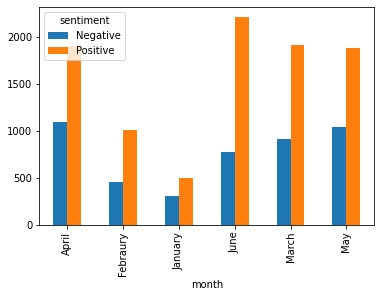

In [ ]:
(d
 .groupby(['month', 'sentiment'])
 .size()
 .unstack()
 .plot.bar()
)

### Overall Sentiment Distribution over months for Pfizer

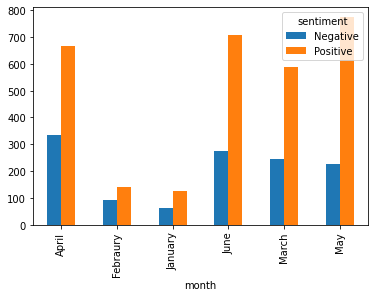

In [ ]:
d_pf = d[d['vaccine']=='pfizer']
(d_pf
 .groupby(['month', 'sentiment'])
 .size()
 .unstack()
 .plot.bar()
)

### Overall Sentiment Distribution over months for Moderna

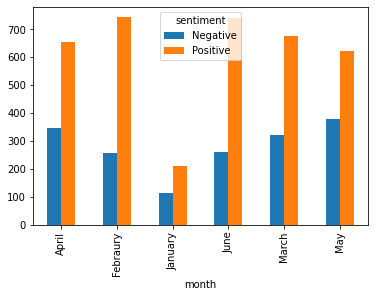

In [ ]:
d_mod = d[d['vaccine']=='moderna']
(d_mod
 .groupby(['month', 'sentiment'])
 .size()
 .unstack()
 .plot.bar()
)

### Overall Sentiment Distribution over months for J&J

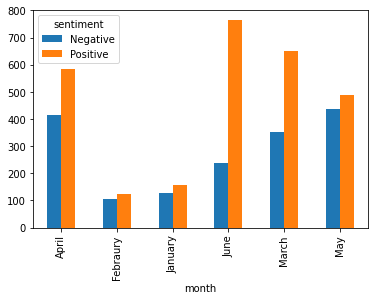

In [ ]:
d_jj = d[d['vaccine']=='johnson&johnson']
(d_jj
 .groupby(['month', 'sentiment'])
 .size()
 .unstack()
 .plot.bar()
)

## Conclusion : 

## Data has been visualized and the following results were inferred: 

1) Word cloud: (A tag cloud (also known as a word cloud, wordle or weighted list in visual design) is a visual representation of text data, which is often used to depict keyword metadata on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color. When used as website navigation aids, the terms are hyperlinked to items associated with the tag.)

Ref : https://en.wikipedia.org/wiki/Tag_cloud
 
 --> For Pfizer, we created a word cloud, the words with the high frequencies are "covid", "vaccine", "coronavirus". (The larger the word, the higher the frequency and vice-versa)

 --> For Moderna, we created a word cloud, the words with the high frequencies are "covid", "vaccine", "moderna".

  --> For Johnson&Johnson, we created a word cloud, the words with the high frequencies are "johnson", "coronavirus", "vaccine".

2) We ran our SVM model and got the following result - 

Positive    9412

Negative    4579

Name: sentiment, dtype: int64

### This means across all the vaccine tweets (that had the query Pfizer, Moderna and Johnson&Johnson), there are 9412 positive tweets, and 4579 negative tweets. At least some positivity here!

3) For pfizer: We got 3003 positive tweets and 1233 negative tweets

Positive    3003

Negative    1233

Name: sentiment, dtype: int64

4) For moderna, we got 3648 positive tweets and 1674 negative tweets

Positive    3648

Negative    1674

Name: sentiment, dtype: int64

5) For Johnson&Johnson, we got 2761 positive tweets and 1672 negative tweets

Positive    2761

Negative    1672

Name: sentiment, dtype: int64

6) From the above graphs, we have shown some distribution of positive and negative over first 6 months of vaccine release, and displayed it as a bar graph